In [2]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Net Monthly Imports/Exports

Import dataset into a pandas dataframe and perform a few initial preprocessing steps and print the head.

In [3]:
file_path = "./data/overall_natgas_imports_exports_monthly.csv"
df = pd.read_csv(file_path)
df['date']= pd.to_datetime(df["date"], format="%b-%y")
df = df.set_index(["date"])
print("Dataframe Shape:", df.shape)
df.head()

Dataframe Shape: (281, 13)


,pipe_imports_belgium_GWh,pipe_imports_netherlands_GWh,pipe_imports_norway_GWh,lng_imports_GWh,total_imports_GWh,pipe_exports_belgium_GWh,pipe_exports_netherlands_GWh,pipe_exports_norway_GWh,pipe_exports_republic_ireland_GWh,pipe_exports_isle_of_man_GWh,lng_exports_GWh,total_exports_GWh,net_imports_GWh
date,,,,,,,,,,,,,
2000-01-01,0.0,0.0,1040.0,0.0,1040.0,5884.0,974.0,0.0,3051.0,0.0,0.0,9909.0,-8869.0
2000-02-01,0.0,0.0,971.0,0.0,971.0,7111.0,846.0,0.0,2841.0,0.0,0.0,10798.0,-9827.0
2000-03-01,0.0,0.0,1063.0,0.0,1063.0,8219.0,908.0,0.0,2843.0,0.0,0.0,11970.0,-10907.0
2000-04-01,0.0,0.0,975.0,0.0,975.0,11783.0,814.0,0.0,2778.0,0.0,0.0,15375.0,-14400.0
2000-05-01,0.0,0.0,859.0,0.0,859.0,12055.0,689.0,0.0,2514.0,0.0,0.0,15258.0,-14399.0


Plot pipeline and LNG gas imports and the overall imports. Note some pipelines are not operation until after 2007.

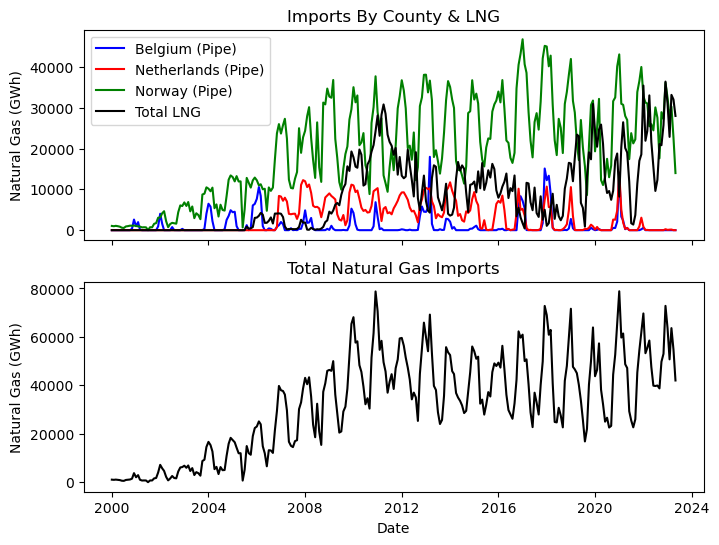

In [26]:
plot_cols = ["pipe_imports_belgium_GWh", "pipe_imports_netherlands_GWh", "pipe_imports_norway_GWh", "lng_imports_GWh"]
colors = ["b", "r", "g", "k"]
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
for i,col in enumerate(plot_cols):
    axs[0].plot(df.index, df[col], colors[i])
axs[0].set_title("Imports By County & LNG")
axs[0].set_ylabel("Natural Gas (GWh)")
axs[0].legend(labels=["Belgium (Pipe)", "Netherlands (Pipe)", "Norway (Pipe)", "Total LNG"])
axs[1].set_title("Total Natural Gas Imports")
axs[1].plot(df.index, df["total_imports_GWh"], "k")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Natural Gas (GWh)")
plt.show()

Plot significant pipeline exports and the overall exports. Note some pipelines are not operation until after 2007.

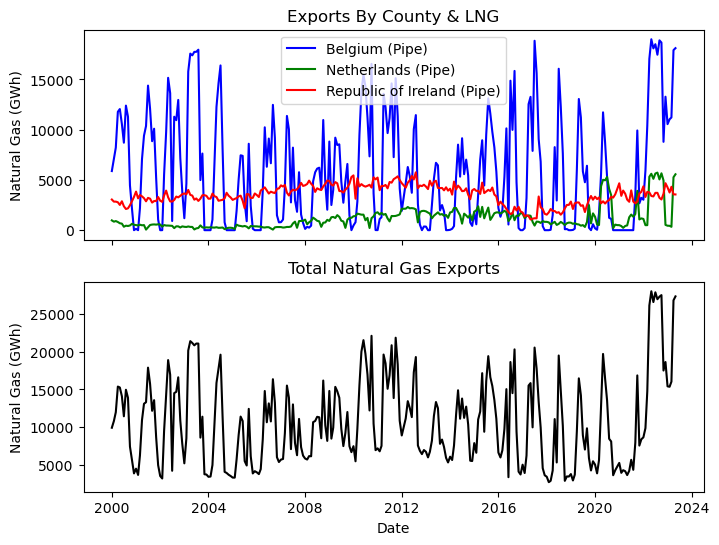

In [29]:
plot_cols = ["pipe_exports_belgium_GWh", "pipe_exports_netherlands_GWh", "pipe_exports_republic_ireland_GWh"]
colors = ["b", "g", "r"]
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
for i,col in enumerate(plot_cols):
    axs[0].plot(df.index, df[col], colors[i])
axs[0].set_title("Exports By County & LNG")
axs[0].set_ylabel("Natural Gas (GWh)")
axs[0].legend(labels=["Belgium (Pipe)", "Netherlands (Pipe)", "Republic of Ireland (Pipe)"])
axs[1].set_title("Total Natural Gas Exports")
axs[1].plot(df.index, df["total_exports_GWh"], "k")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Natural Gas (GWh)")
plt.show()

Plot net natural gas imports with basic statistical properties and also plot the differenced time series 

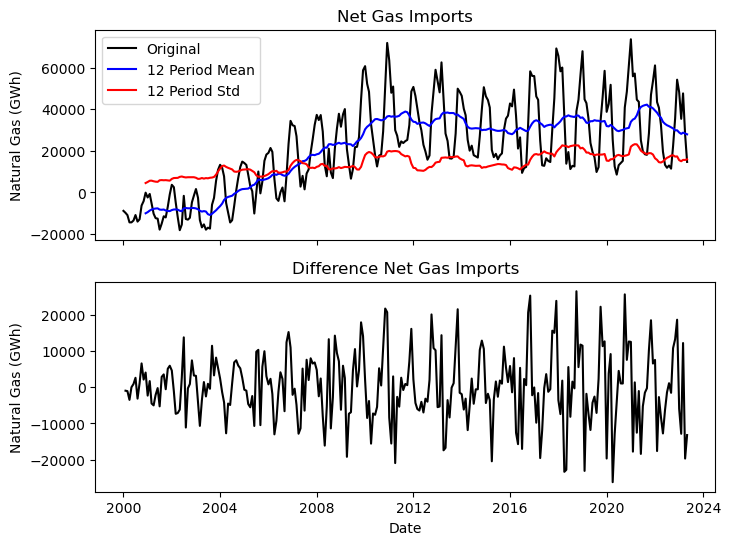

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(df.index, df["net_imports_GWh"], "k")
axs[0].plot(df.index, df["net_imports_GWh"].rolling(12).mean(), "b")
axs[0].plot(df.index, df["net_imports_GWh"].rolling(12).std(), "r")
axs[0].set_title("Net Gas Imports")
axs[0].set_ylabel("Natural Gas (GWh)")
axs[0].legend(labels=["Original", "12 Period Mean", "12 Period Std"])
axs[1].set_title("Difference Net Gas Imports")
axs[1].plot(df.index, df["net_imports_GWh"].diff(1), "k")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Natural Gas (GWh)")
plt.show()

The net gas imports in non-stationary and also has a heteroskedastic volatility with a clear uptrend and possible seasonal affects. After differencing the series appears stationary with a seasonal component and heteroskedastic volatility, therefore an ARIMA + GARCH model would be best.

### Country Monthly LNG Imports

### Net Yearly Natural Gas Imports